In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solution import *
from methods import *
plt.rcParams['figure.figsize'] = [13,8]
plt.rcParams.update({'axes.titlesize': 'xx-large'})

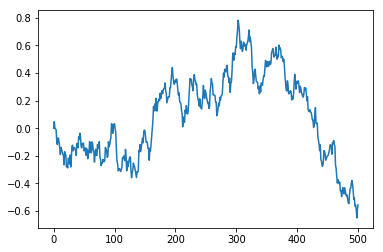

In [24]:
N = 500
T = 1
dt = T/N
dW = np.sqrt(dt)*np.random.normal(0,1,N)
W = np.zeros((N+1,))

W[1:] = np.cumsum(dW)
plt.plot(np.arange(0,501), W)


In [25]:
ito = np.sum(W[0:-1]*dW)
ito

-0.36474259466848463

Text(0.5, 0, 't')

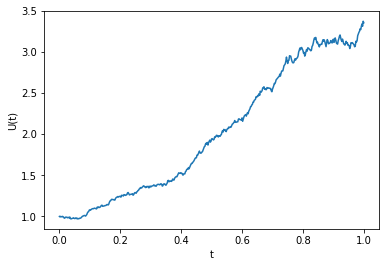

In [28]:
M = 10
t = np.arange(0,T+dt,dt)
dW = np.sqrt(dt)*np.random.normal(0,1,(N,M))
W = np.zeros((N+1,M))
W[1:,:] = np.cumsum(dW, axis=0)
ts = np.transpose(np.tile(t, (M,1)))

U = np.exp(ts + 0.5*W) 
Umean = np.mean(U, axis=1)
plt.plot(t, Umean)
plt.ylabel('U(t)')
plt.xlabel('t')

In [2]:
np.random.normal(0,1,5)

array([-1.62093069, -0.27150896,  1.18772545, -0.44673174, -1.52696054])

In [16]:
np.transpose(np.tile(np.array([1,2,3]), (2,1)))

array([[1, 1],
       [2, 2],
       [3, 3]])

## Using Euler-Muriyama for linear SDE

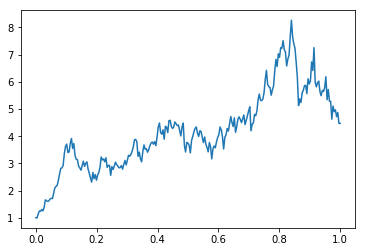

In [18]:
lmbda = 2; mu = 1; X0 = 1
T = 1
N = 2**8
dt = 1/N
dW = np.sqrt(dt)*np.random.normal(0,1,(N,))
W = np.cumsum(dW)
Xem = np.zeros((N+1,))
Xem[0] = X0

for i in range(N):
    Winc = dW[i]
    Xem[i+1] = Xem[i] + lmbda*Xem[i]*dt + mu*Xem[i]*Winc
    
t = np.linspace(0,T,N+1)
plt.plot(t, Xem)

In [15]:
t[1]-t[0]

0.00390625

In [16]:
dt

0.00390625

In [10]:
W[0]

-0.11111025255042838

In [11]:
dW[0]

-0.11111025255042838

## Euler-Maruyama for van der pol

$\begin{align*}
x &= x + vdt \\
v &= v + [\mu(1-x^{2})v-x]dt + dW
\end{align*}$

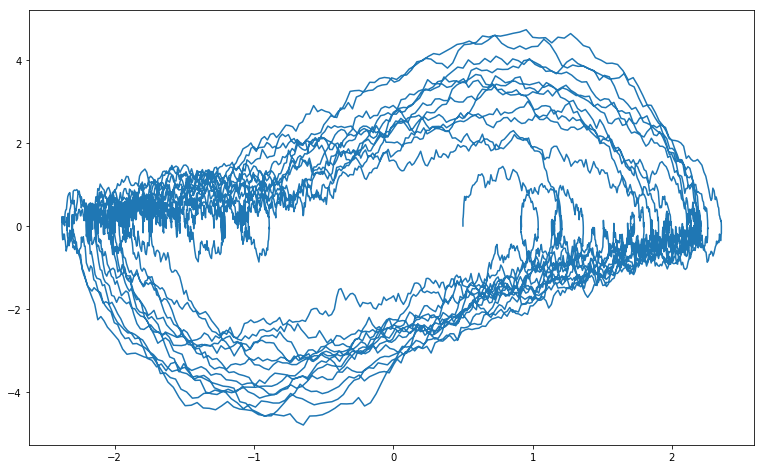

In [56]:
def vdp_noise(T, dt, m=0, seed=0):
    np.random.seed(seed)
    mu = 1.5;
    t = np.arange(0,T+dt,dt)
    N = t.shape[0]-1
    dWs = np.sqrt(dt)*np.random.normal(m,1,(N,))
    X = np.zeros((N+1,2))
    X[0,:] = np.array([0.5,0])

    for i in range(N):
        x = X[i,0]; v = X[i,1]
        X[i+1,0] = x + v*dt
        X[i+1,1] = v + (mu*(1-x**2)*v - x)*dt + dWs[i]

    return (X, t)

def diffSol(sol1, sol2, t):
    D = np.linalg.norm(sol1-sol2, axis=1)

    plt.plot(t, D)
    return 0


X0,t = vdp_noise(100, 0.01, 0, 0)
#X1,t = vdp_noise(100, 0.01, 0.1, 0)


plt.plot(X0[:,0],X0[:,1])


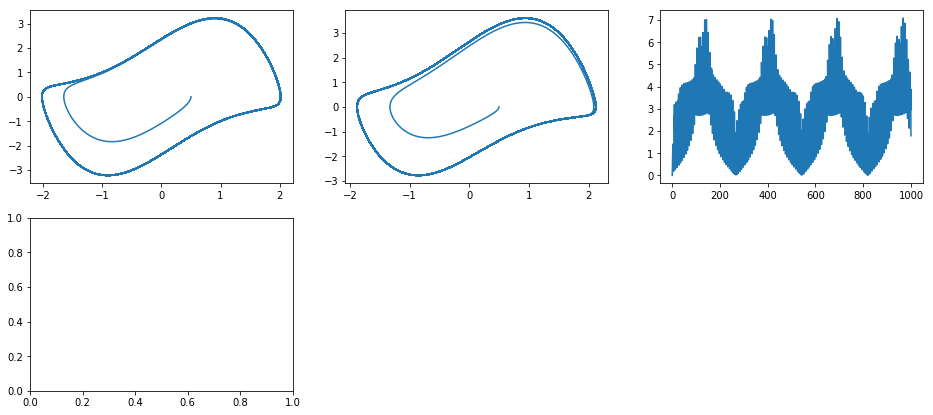

In [194]:
def euler_n(T, dt, noise=0):
    mu = 1.5;
    t = np.arange(0,T+dt,dt)
    N = t.shape[0]-1
    X = np.zeros((N+1,2))
    X[0,:] = np.array([0.5,0])
    
    for i in range(N):
        x = X[i,0]; v = X[i,1]
        X[i+1,0] = x + v*dt
        # Deterministic "noise"
        X[i+1,1] = v + (mu*(1-x**2)*v - x)*dt + noise
        
    return (X,t)

X2,t = euler_n(1000, 0.001)
X3,t = euler_n(1000, 0.001, noise=0.0003)
N = t.shape[0]

fig=plt.figure(figsize=(16, 7), facecolor='w', edgecolor='k')
plt.subplot(231)
plt.plot(X2[:,0], X2[:,1])
plt.subplot(232)
plt.plot(X3[:,0], X3[:,1])
plt.subplot(233)
diffSol(X2,X3,t)
plt.subplot(234)


    

126
125


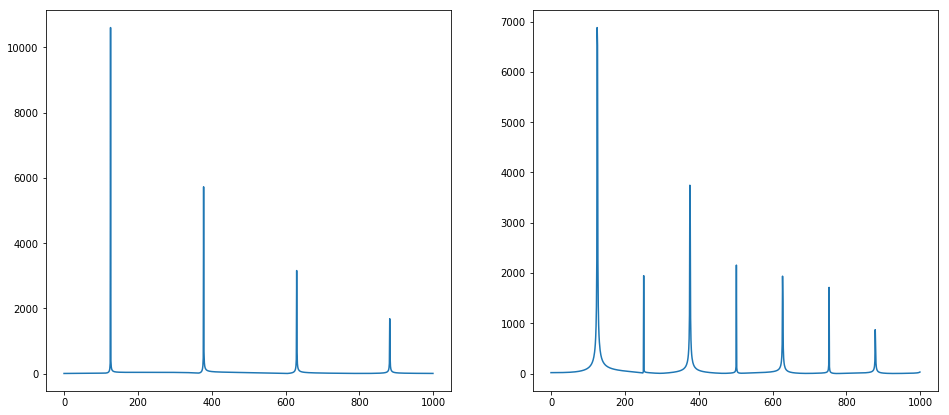

In [132]:
F2 = np.abs(np.fft.fft(X2[:,1]))
F3 = np.abs(np.fft.fft(X3[:,1]))
fig=plt.figure(figsize=(16, 7), facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(np.arange(0,1000), F2[0:1000])
plt.subplot(122)
plt.plot(np.arange(0,1000), F3[0:1000])
print(np.argmax(F2[0:200]))
print(np.argmax(F3[0:200]))

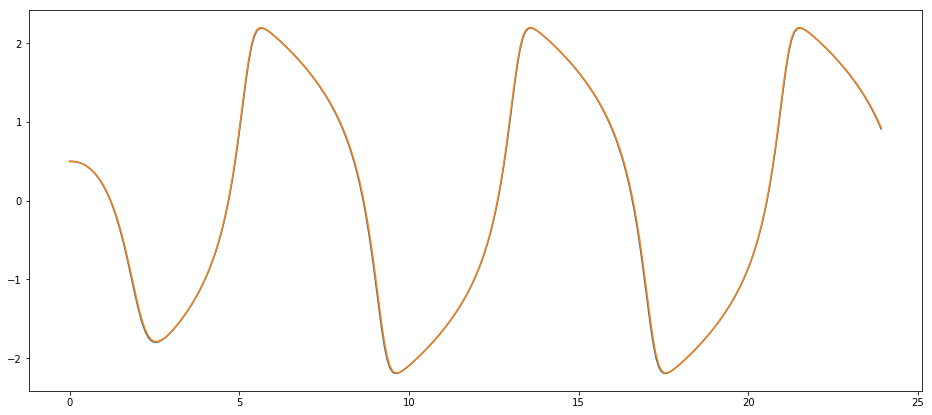

In [134]:
fig=plt.figure(figsize=(16, 7), facecolor='w', edgecolor='k')
low = 0; hi = 300
plt.plot(t[low:hi], X2[low:hi,0])
plt.plot(t[low:hi], X3[low:hi,0])

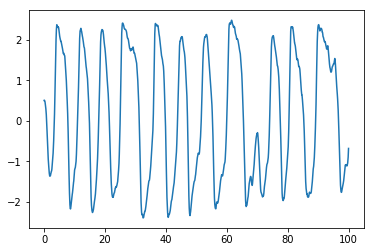

In [31]:
plt.plot(t,X[:,0])

## Test on real van der pol

In [121]:
mu = 0.8
dt = 0.01
np.random.seed(0)

def vp_eq(state):
    x = state[0]
    y = state[1]
    return np.array([y, mu*(1-x**2)*y - x])

def vp_eq2(state):
    x = state[0]
    y = state[1]
    return np.array([y, mu*(1-x**2)*y - x + 0.00006/dt])

def vp_rand(state):
    x = state[0]
    y = state[1]
    return np.array([y,
                    mu*(1-x**2)*y - x + (1/dt)*np.sqrt(dt)*np.random.normal()])


V0 = np.array([1, -1])
V1 = np.array([1.2, -0.8])
T = 1000
vp0 = euler(vp_eq, V0, 0, T, dt)
vp_test = euler(vp_eq, V1, 0, T, dt)
vp1 = rk4(vp_eq, V0, 0, T, dt)

vp_r0 = euler(vp_rand, V0, 0, T, dt)
vp_r1 = rk4(vp_rand, V0, 0, T, dt)

# Constant noise
vp_n0 = euler(vp_eq2, V0, 0, T, dt)
vp_n1 = rk4(vp_eq2, V0, 0, T, dt)



<IPython.core.display.Javascript object>


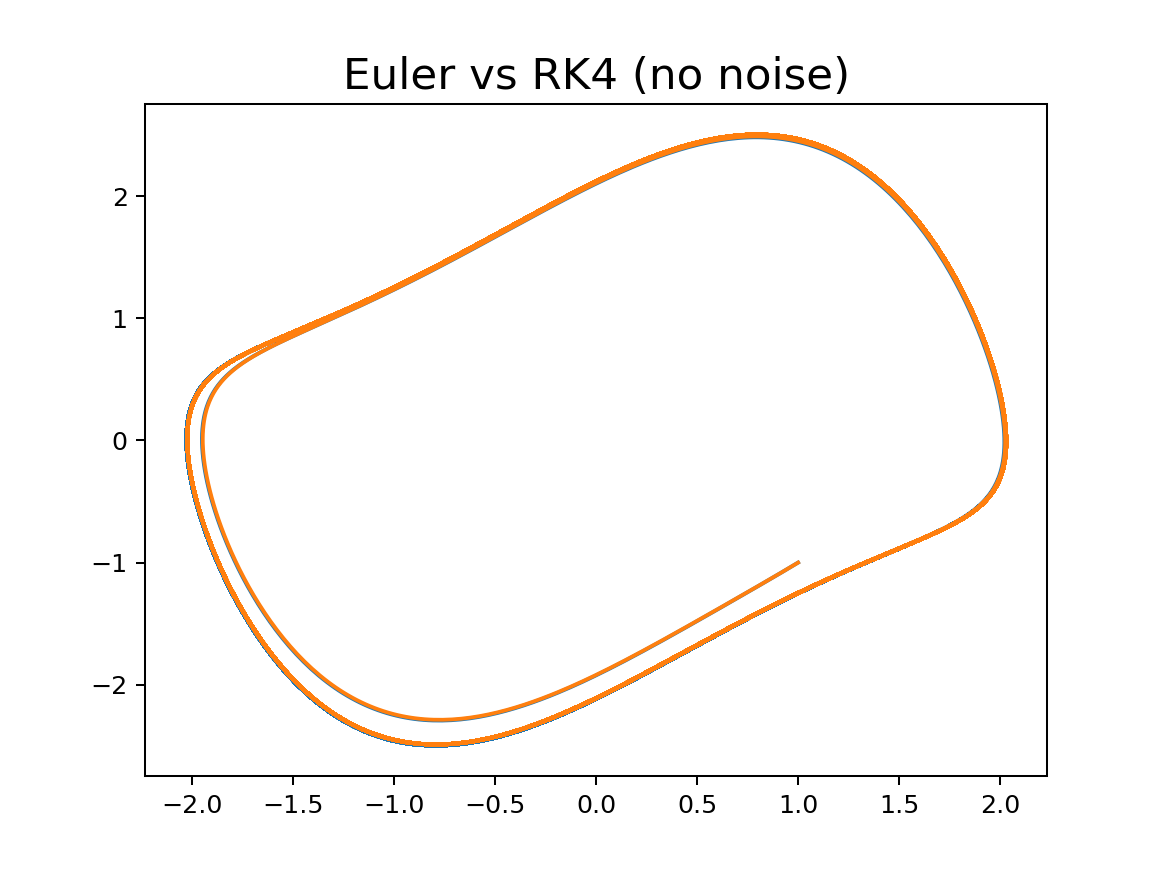

Text(0.5, 1.0, 'Euler vs RK4 (no noise)')

In [123]:
%matplotlib notebook

phasePortrait(vp0,0,1)
phasePortrait(vp_n0,0,1)
#diffSolution(vp0,vp_n0)
plt.title('Euler vs RK4 (no noise)')


Text(0.5, 1.0, 'Euler vs. RK4 (both with Gaussian noise)')

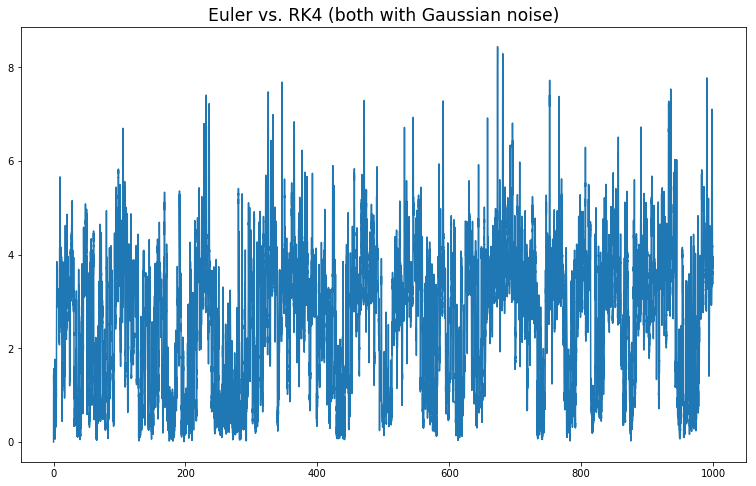

In [53]:
diffSolution(vp_r1, vp_r0)
plt.title('Euler vs. RK4 (both with Gaussian noise)')

<IPython.core.display.Javascript object>


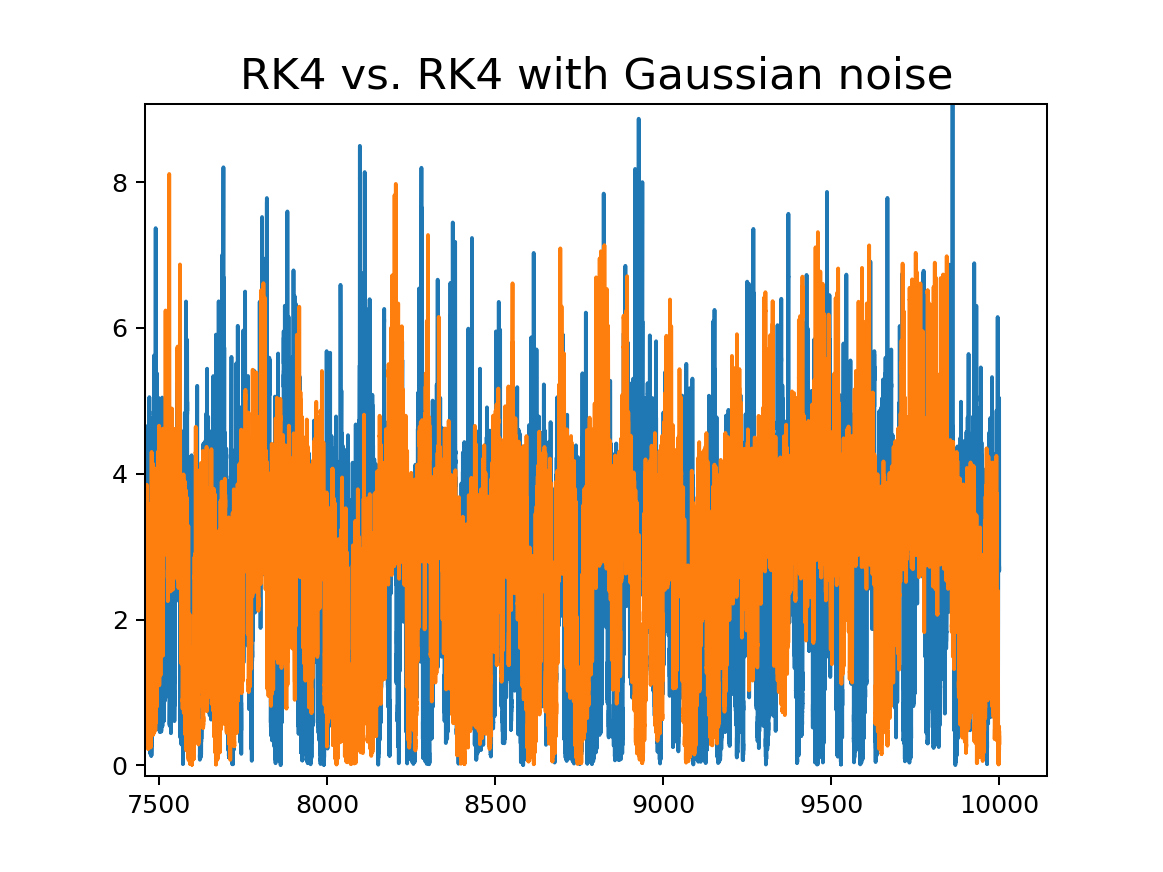

Text(0.5, 1.0, 'Euler vs. Euler with Gaussian noise')

In [66]:
diffSolution(vp0,vp_r0)
plt.title('Euler vs. Euler with Gaussian noise')

<IPython.core.display.Javascript object>


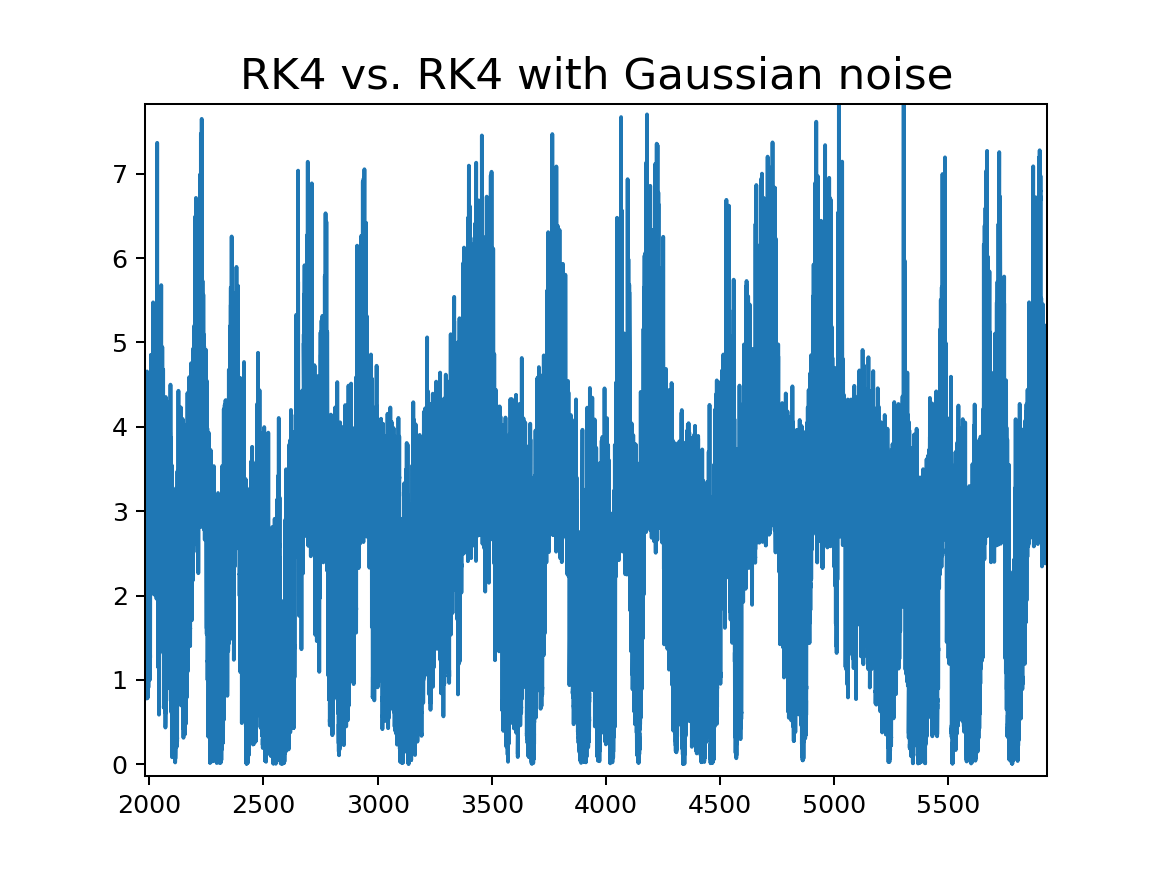

Text(0.5, 1.0, 'RK4 vs. RK4 with Gaussian noise')

In [68]:
diffSolution(vp1, vp_r1)
plt.title('RK4 vs. RK4 with Gaussian noise')

<IPython.core.display.Javascript object>


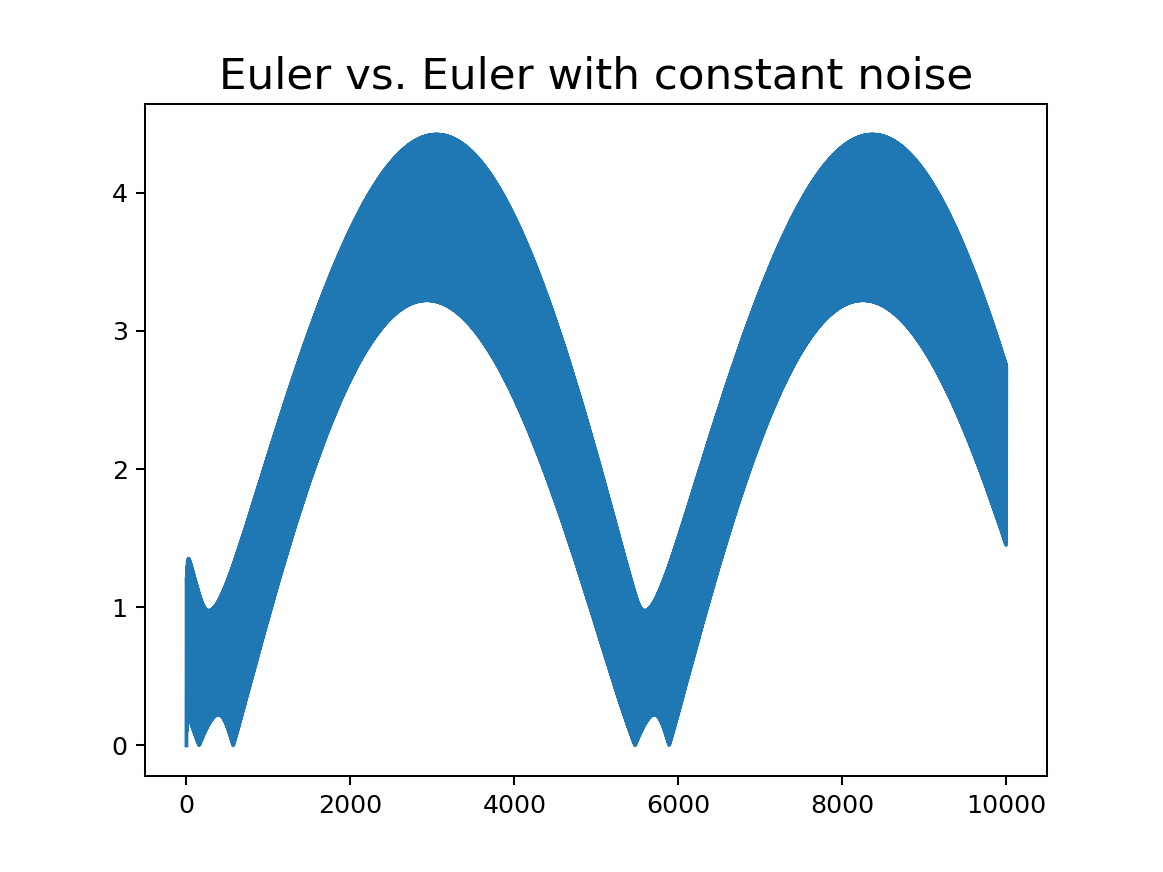

Text(0.5, 1.0, 'Euler vs. Euler with constant noise')

In [96]:
%matplotlib notebook
diffSolution(vp0, vp_n0)
#phasePortrait(vp_n0,0,1)
#phasePortrait(vp0,0,1)
plt.title('Euler vs. Euler with constant noise')

<IPython.core.display.Javascript object>


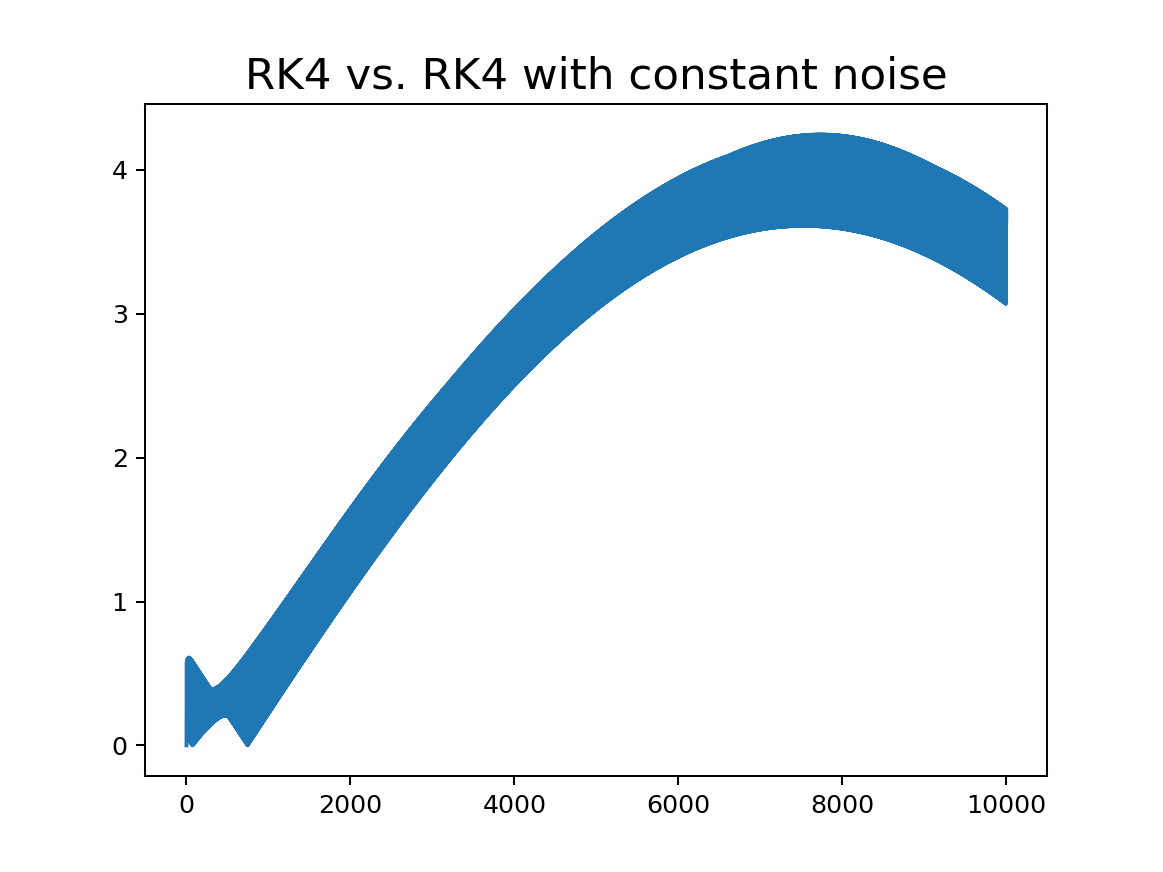

Text(0.5, 1.0, 'RK4 vs. RK4 with constant noise')

In [93]:
%matplotlib notebook
diffSolution(vp1, vp_n1)
plt.title('RK4 vs. RK4 with constant noise')

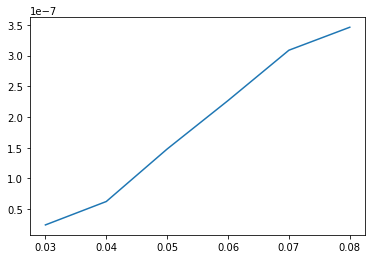

In [213]:
h = np.arange(0.03,0.09,0.01)
T = np.array([6400,4000,2600,2100,1800,1700])
plt.plot(h,1/(T**2))

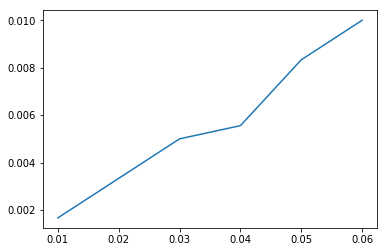

In [211]:
T = np.array([600, 300, 200,180,120,100])
h = np.array([0.01, 0.02, 0.03,0.04,0.05,0.06])
plt.plot(h, 1/T)

## Test on harmonic oscillator
$\begin{align*}
x'' &= -kx \\
\frac{du}{dt} &= v \\
\frac{dv}{dt} &= -ku
\end{align*}$

<IPython.core.display.Javascript object>


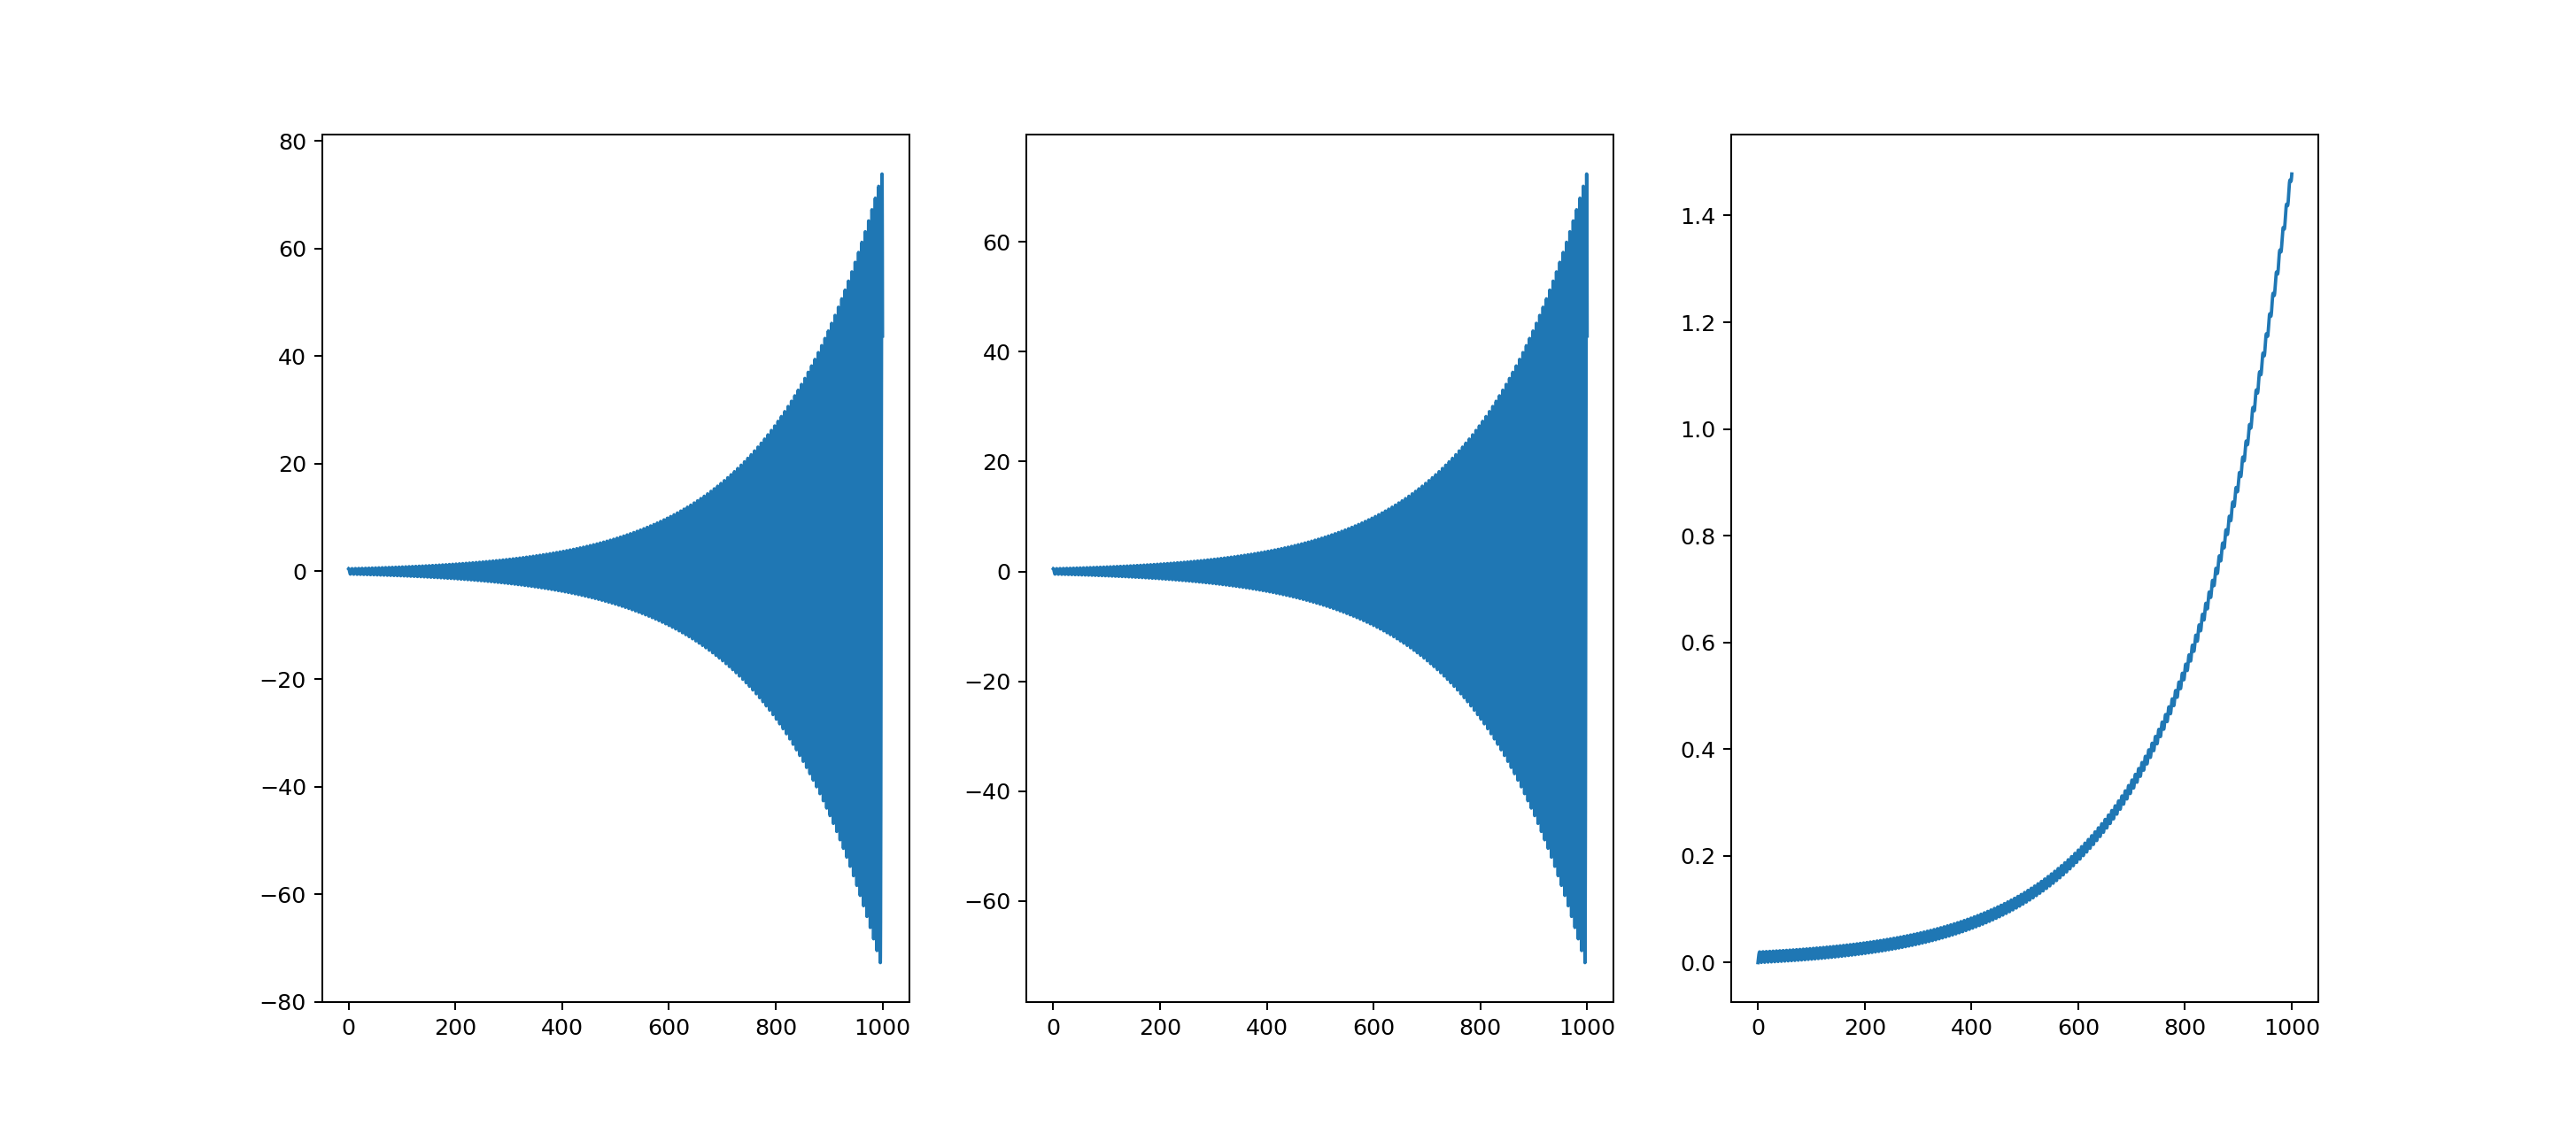

array([0.00000000e+00, 1.00000000e-04, 2.00002500e-04, ...,
       1.47757713e+00, 1.47773150e+00, 1.47788647e+00])

In [4]:
k = 1
def harm(state):
    u = state[0]
    v = state[1]
    return np.array([v, -k*u])
def harm_n(state):
    u = state[0]
    v = state[1]
    return np.array([v, -k*u + 0.01])



harm0 = np.array([0.5, 0])
#hs0 = rk2(harm, harm0, 0, 100, 0.01)
hs0 = euler(harm, harm0, 0, 1000, 0.01)
hs1 = euler(harm_n, harm0, 0, 1000, 0.01)
hs3 = rk4(harm, harm0, 0, 1000, 0.01)
hs2 = rk4(harm_n, harm0, 0, 1000, 0.01)
hs4 = rk2(harm, harm0, 0, 1000, 0.01)
fig=plt.figure(figsize=(16, 7), facecolor='w', edgecolor='k')
plt.subplot(131)
plotSolution(hs0 ,0)
plt.subplot(132)
plotSolution(hs1, 0)
plt.subplot(133)
diffSolution(hs0, hs1)

<IPython.core.display.Javascript object>


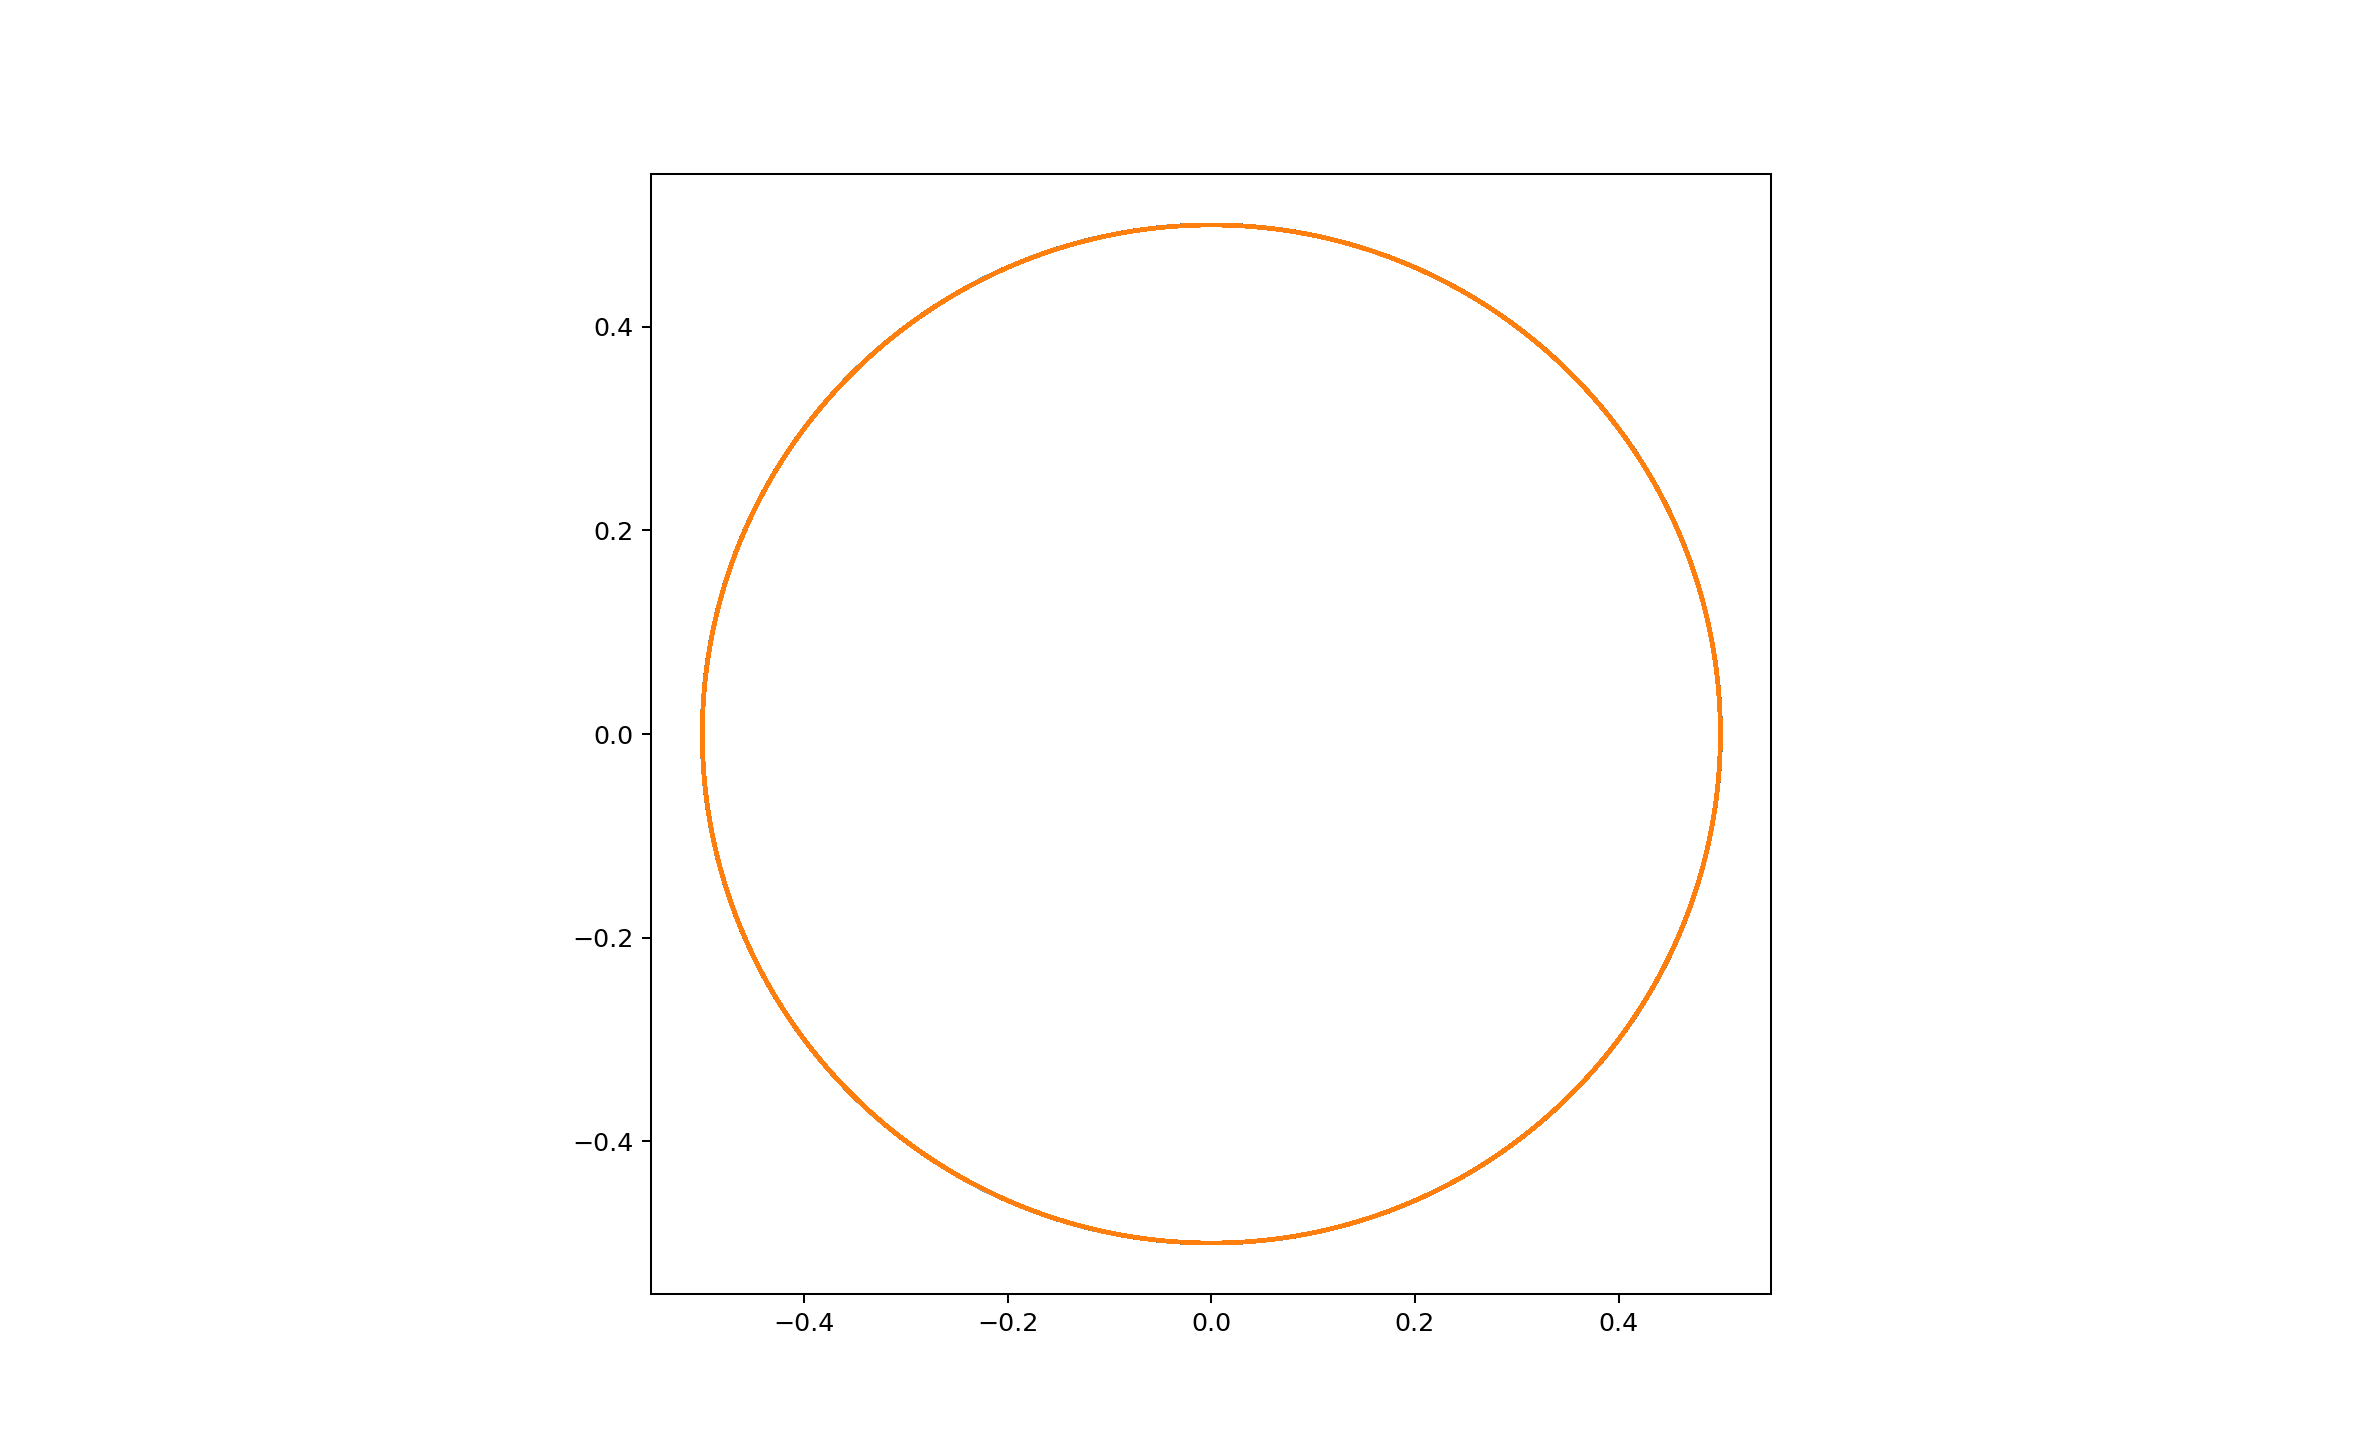

(-0.5500676974678647,
 0.5500686300972427,
 -0.5500670625399591,
 0.5500682667098775)

In [5]:
%matplotlib notebook
phasePortrait(hs4,0,1)
phasePortrait(hs3,0,1)
plt.axis('scaled')

<IPython.core.display.Javascript object>


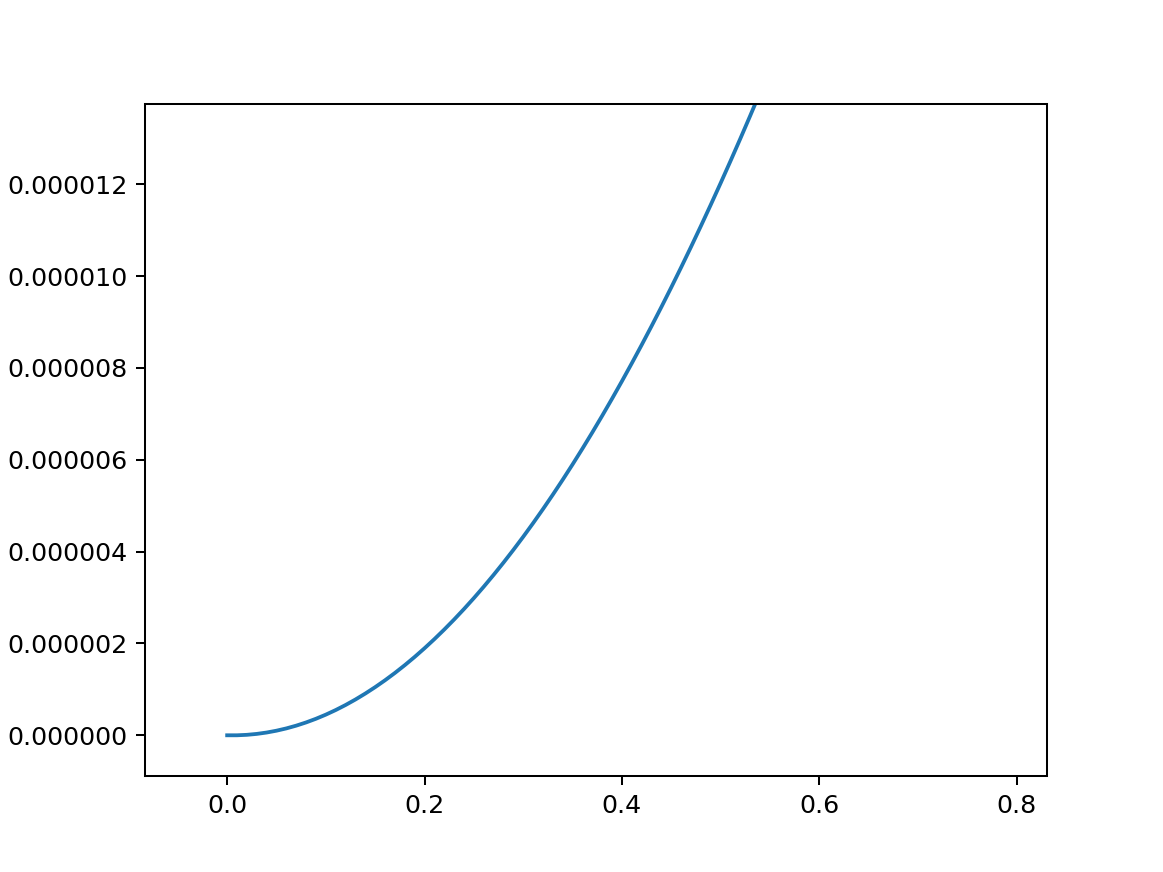

9.999500000246186e-08


In [41]:
k0 = 0; k1 = 10000
#plt.plot(hs0.time[k0:k1], hs0.trajectory[k0:k1,0])
#plt.plot(hs0.time[k0:k1], hs1.trajectory[k0:k1,0])
plt.plot(hs0.time[k0:k1],hs1.trajectory[k0:k1,0]-hs0.trajectory[k0:k1,0])
#plt.plot(hs0.time[k0:k1],hs0.trajectory[k0:k1,1]-hs1.trajectory[k0:k1,1])
print(hs1.trajectory[5,0]-hs0.trajectory[5,0])


In [253]:
3*0.0001*0.01**2

3.0000000000000004e-08

In [258]:
10*(0.01**2)*0.0001-4*(0.01**4)*0.0001

9.9996e-08

Done


<IPython.core.display.Javascript object>


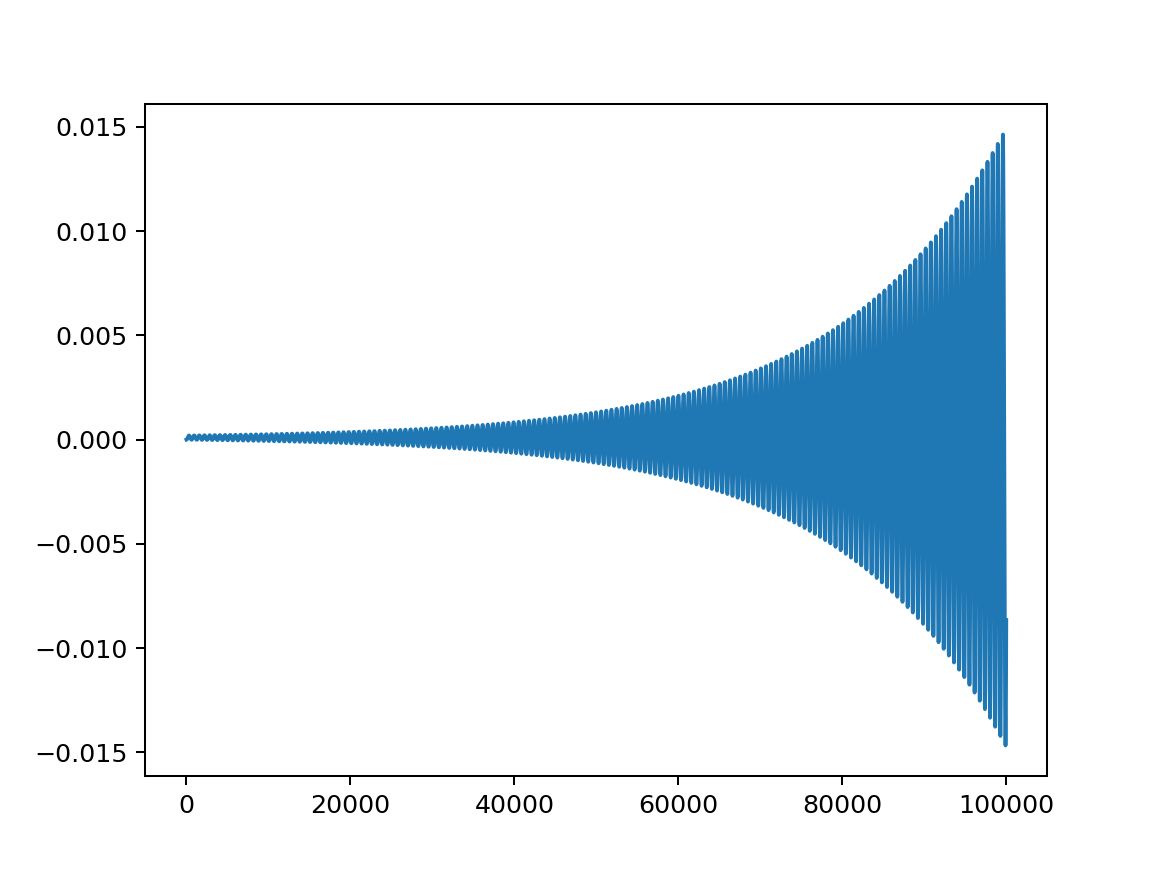

In [46]:
h = 0.01
eta = 0.0001
N = 100000
xs = np.zeros((N+1,))
ys = np.zeros((N+1,))
def getErr():
    for i in range(N):
        xs[i+1] = xs[i] + h*ys[i]
        ys[i+1] = ys[i] + h*eta - h*k*xs[i]
        
    print('Done')

    
getErr()
   
%matplotlib notebook
plt.plot(np.arange(0,N+1), xs)


In [29]:
2+2

4